In [1]:
#Import necessary libraries and copy CSV file to dataframe

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from termcolor import colored
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

data = pd.read_csv(r'E:\Advanced Decision Making\Coursework\Documents\ESS_Titanic.csv')
data['Age']=data['Age'].fillna(data['Age'].median())

grouped = data.groupby(data.Transported)
data_test = grouped.get_group("*System Error*")
data['Transported'] = data['Transported'].replace(['*System Error*'],None)

data_train = data.copy()

data_train = data_train.dropna()
data_test = data_test.dropna()

data_test_copy = data_test.copy()
r_seed=42
np.random.seed(r_seed)


In [2]:
#Check dataframe
data.head(20)

,TicketNo,First Name,Last Name,HomePlanet,Cabin,Destination,BodyState,Age,VIP,RoomService,FoodCourt,Mall,Spa,VR Deck,Transported
0,0001-1,Maham,Ofracculy,Trapist 1e,Delta-0001-L,Kepler 186f,Normal,41.0,NO,0.0,0.0,0.0,0.0,0.0,FALSE
1,0002-1,Juanna,Vines,Earth,Gamma-0001-R,Kepler 186f,Normal,26.0,NO,1079.1,89.1,247.5,5435.1,435.6,TRUE
2,0003-1,Altark,Susent,Trapist 1e,Beta-0001-R,Kepler 186f,Normal,60.0,VIP,425.7,35402.4,0.0,66478.5,485.1,FALSE
3,0003-2,Solam,Susent,Trapist 1e,Beta-0001-R,Kepler 186f,Normal,34.0,NO,0.0,12701.7,3672.9,32957.1,1910.7,FALSE
4,0004-1,Willy,Santantines,Earth,Gamma-0002-R,Kepler 186f,Normal,18.0,NO,2999.7,693.0,1494.9,5593.5,19.8,TRUE
5,0005-1,Sandie,Hinetthews,Earth,Gamma-0001-L,Kepler 452b,Normal,46.0,NO,0.0,4781.7,0.0,2880.9,0.0,TRUE
6,0006-1,Billex,Jacostaffey,Earth,Gamma-0003-R,Kepler 186f,Normal,28.0,NO,415.8,15236.1,29.7,0.0,0.0,TRUE
7,0006-2,Candra,Jacostaffey,Earth,Kappa-0001-R,Kepler 186f,Cryostasis,29.0,NO,0.0,0.0,0.0,0.0,0.0,TRUE
8,0007-1,Andona,Beston,Earth,Gamma-0004-R,Kepler 186f,Normal,37.0,NO,0.0,7771.5,168.3,2138.4,0.0,TRUE
9,0008-1,Erraiam,Flatic,Trapist 1e,Delta-0002-L,Kepler 442b,Cryostasis,16.0,NO,0.0,0.0,0.0,0.0,0.0,TRUE


In [3]:
#Check dataframe's columns and null values per column
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 12972
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TicketNo     7559 non-null   object 
 1   First Name   7559 non-null   object 
 2   Last Name    7559 non-null   object 
 3   HomePlanet   7559 non-null   object 
 4   Cabin        7559 non-null   object 
 5   Destination  7559 non-null   object 
 6   BodyState    7559 non-null   object 
 7   Age          7559 non-null   float64
 8   VIP          7559 non-null   object 
 9   RoomService  7559 non-null   float64
 10  FoodCourt    7559 non-null   float64
 11  Mall         7559 non-null   float64
 12  Spa          7559 non-null   float64
 13  VR Deck      7559 non-null   float64
 14  Transported  7559 non-null   object 
dtypes: float64(6), object(9)
memory usage: 944.9+ KB


Percentage of Passengers Transported - 50.32%
Percentage of Passengers Not Transported - 49.68%


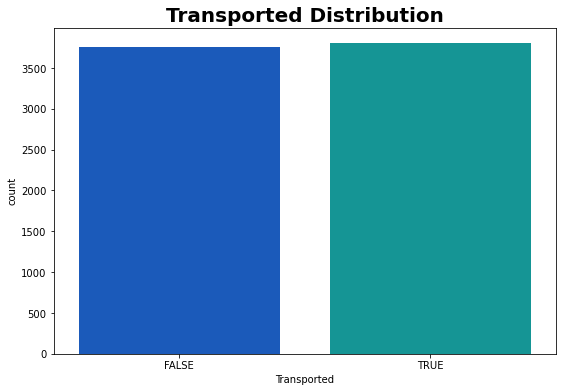

In [4]:
#Transported
plt.figure(figsize=(9,6))

sns.countplot(x='Transported', data=data_train, palette = 'winter')
plt.title("Transported Distribution", size = 20, weight='bold')
print(colored(f"Percentage of Passengers Transported - {(len(data_train[data_train['Transported']=='TRUE']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of Passengers Not Transported - {(len(data_train[data_train['Transported']=='FALSE']) / data_train.shape[0])*100:.2f}%", 'blue'))
plt.show()

In [5]:
#cabin (train)
data_train['Cabin'].fillna('Wmega-9999-Wmega', inplace=True)
data_train['deck'] = data_train['Cabin'].apply(lambda x : x.split('-')[0])
data_train['side'] = data_train['Cabin'].apply(lambda x : x.split('-')[2])

#cabin (test)
data_test['Cabin'].fillna('Wmega-9999-Wmega', inplace=True)
data_test['deck'] = data_test['Cabin'].apply(lambda x : x.split('-')[0])
data_test['side'] = data_test['Cabin'].apply(lambda x : x.split('-')[2])

Cabin Deck Distribution - 
      Deck  Count
0    Gamma   2465
1    Kappa   2282
2     Zeta    777
3    Delta    703
4  Epsilon    669
5     Alfa    432
6     Beta    229
7    Lamda      2
Cabin Side Distribution - 
  Side  Count
0    R   3816
1    L   3743


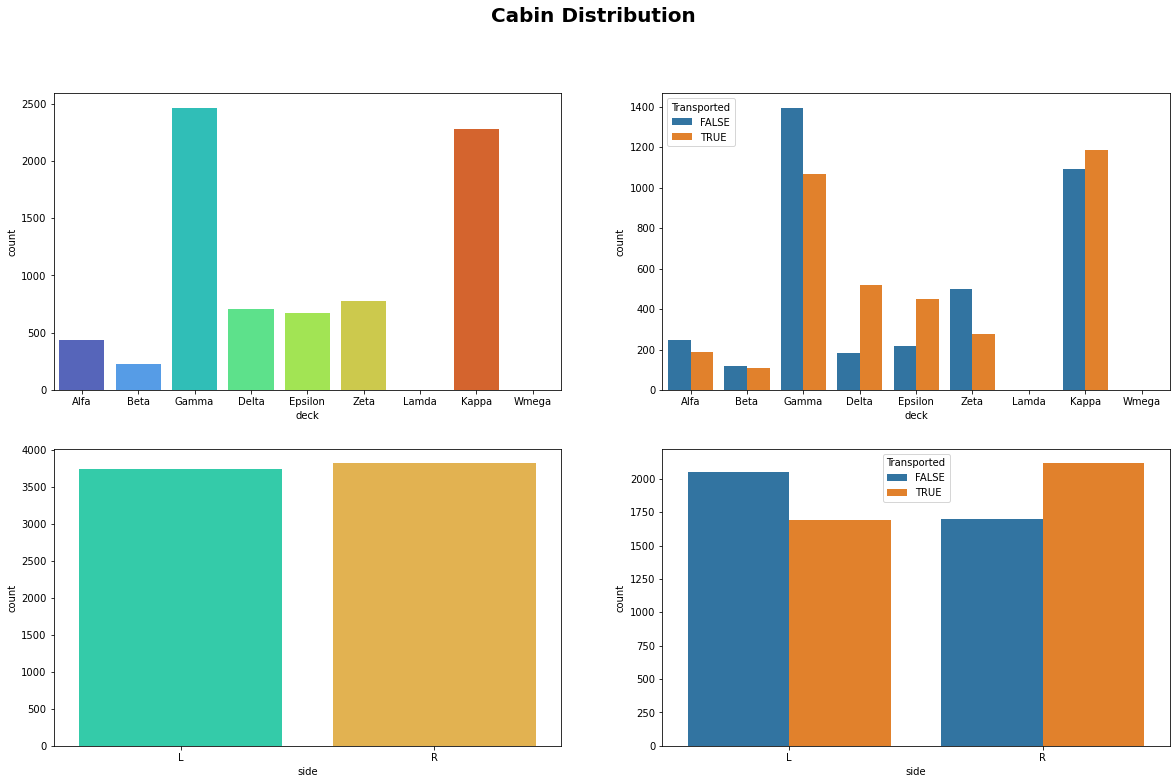

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,12))
fig.suptitle('Cabin Distribution', size = 20, weight='bold')

sns.countplot(x='deck', data=data_train, order=['Alfa','Beta','Gamma','Delta','Epsilon','Zeta','Lamda','Kappa','Wmega'], ax=ax[0][0], palette='turbo')
sns.countplot(x='deck', data=data_train, order=['Alfa','Beta','Gamma','Delta','Epsilon','Zeta','Lamda','Kappa','Wmega'], hue='Transported', ax=ax[0][1])

sns.countplot(x='side', data=data_train, ax=ax[1][0], palette='turbo')
sns.countplot(x='side', data=data_train, hue='Transported', ax=ax[1][1])

print(colored("Cabin Deck Distribution - ",'red'))
data8 = pd.DataFrame(data_train['deck'].value_counts()).reset_index().rename(columns={'index': 'Deck', 'deck':'Count'})
print(colored(data8, 'red'))

print(colored("Cabin Side Distribution - ",'blue'))
data9 = pd.DataFrame(data_train['side'].value_counts()).reset_index().rename(columns={'index': 'Side', 'side':'Count'})
print(colored(data9, 'blue'))

plt.show()

Percentage of Earth - 54.25%
Percentage of Trapist 1e - 25.02%
Percentage of 55-Cancri e - 20.73%


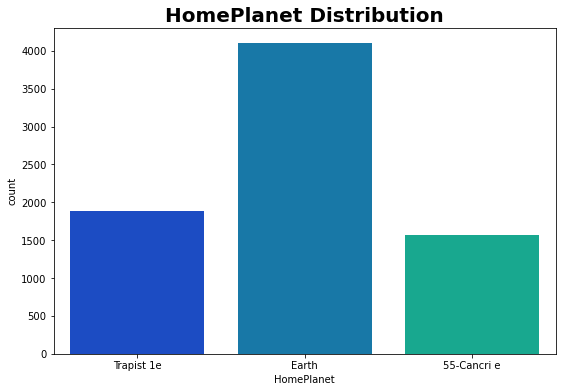

In [7]:
#HomePlanet
plt.figure(figsize=(9,6))

sns.countplot(x='HomePlanet', data=data_train, palette = 'winter')
plt.title("HomePlanet Distribution", size = 20, weight='bold')
print(colored(f"Percentage of Earth - {(len(data_train[data_train['HomePlanet']=='Earth']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of Trapist 1e - {(len(data_train[data_train['HomePlanet']=='Trapist 1e']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of 55-Cancri e - {(len(data_train[data_train['HomePlanet']=='55-Cancri e']) / data_train.shape[0])*100:.2f}%", 'blue'))
plt.show()

HomePlanet Distribution:
    HomePlanet  Count
0        Earth   4101
1   Trapist 1e   1891
2  55-Cancri e   1567


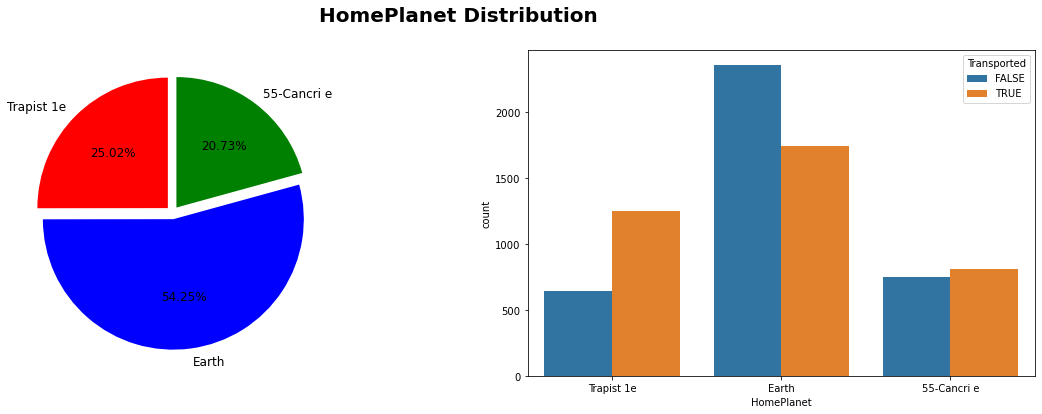

In [8]:
#HomePlanet VS Transported
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('HomePlanet Distribution', size = 20, weight='bold')

sizes = list(data_train['HomePlanet'].value_counts(sort=False))

labels = data_train['HomePlanet'].dropna().unique()
colors = ['red', 'blue', 'green']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='HomePlanet', data=data_train, hue='Transported', ax=ax[1])

print(colored("HomePlanet Distribution:",'green'))
data1 = pd.DataFrame(data_train['HomePlanet'].value_counts()).reset_index().rename(columns={'index': 'HomePlanet', 'HomePlanet':'Count'})
print(colored(data1, 'green'))

plt.show()

Transported Passengers Age Distribution:
Minimum Age - 1.0
Maximum Age - 80.0
Average Age - 29.51104100946372
Non Transported Passengers Age Distribution:
Minimum Age - 1.0
Maximum Age - 81.0
Average Age - 31.037549933422103


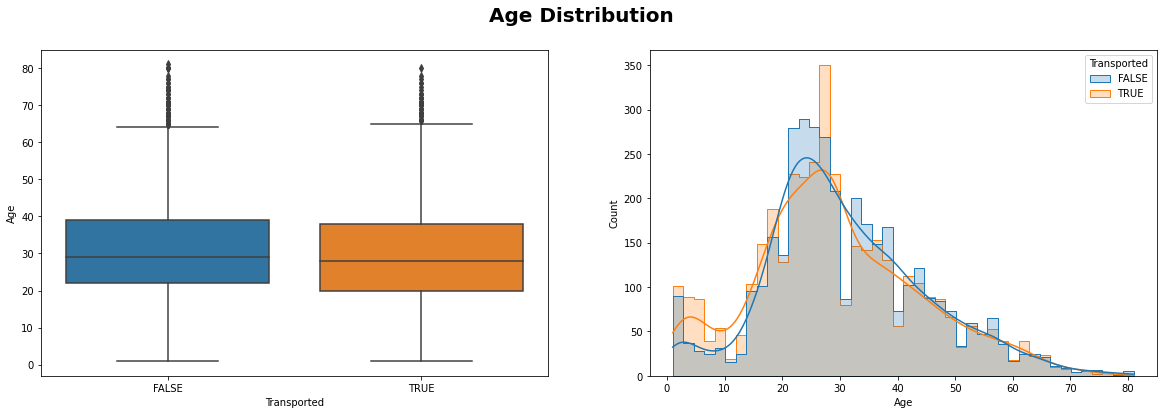

In [9]:
#Age Distribution
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Age Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Age', data=data_train, ax=ax[0])
sns.histplot(x='Age', element="step", kde=True, data=data_train, hue='Transported', ax=ax[1])

print(colored("Transported Passengers Age Distribution:", 'green'))
print(colored(f"Minimum Age - {data_train[data_train['Transported']=='TRUE']['Age'].describe()['min']}", 'green'))
print(colored(f"Maximum Age - {data_train[data_train['Transported']=='TRUE']['Age'].describe()['max']}", 'green'))
print(colored(f"Average Age - {data_train[data_train['Transported']=='TRUE']['Age'].describe()['mean']}", 'green'))

print(colored("Non Transported Passengers Age Distribution:", 'blue'))
print(colored(f"Minimum Age - {data_train[data_train['Transported']=='FALSE']['Age'].describe()['min']}", 'blue'))
print(colored(f"Maximum Age - {data_train[data_train['Transported']=='FALSE']['Age'].describe()['max']}", 'blue'))
print(colored(f"Average Age - {data_train[data_train['Transported']=='FALSE']['Age'].describe()['mean']}", 'blue'))


plt.show()

In [10]:
#Create column AgeGroup (train)
data_train.loc[data_train['Age'] <= 18, 'AgeGroup'] = '0-18'
data_train.loc[(data_train['Age'] > 18) & (data_train['Age'] <= 30), 'AgeGroup'] = '18-30'
data_train.loc[(data_train['Age'] > 30) & (data_train['Age'] <= 50), 'AgeGroup'] = '30-50'
data_train.loc[(data_train['Age'] > 50) & (data_train['Age'] <= 60), 'AgeGroup'] = '50-60'
data_train.loc[(data_train['Age'] > 60), 'AgeGroup'] = '60+'

#Create column AgeGroup (test)
data_test.loc[data_test['Age'] <= 18, 'AgeGroup'] = '0-18'
data_test.loc[(data_test['Age'] > 18) & (data_test['Age'] <= 30), 'AgeGroup'] = '18-30'
data_test.loc[(data_test['Age'] > 30) & (data_test['Age'] <= 50), 'AgeGroup'] = '30-50'
data_test.loc[(data_test['Age'] > 50) & (data_test['Age'] <= 60), 'AgeGroup'] = '50-60'
data_test.loc[(data_test['Age'] > 60), 'AgeGroup'] = '60+'

Percentage of 0-18 - 16.80%
Percentage of 18-30 - 40.55%
Percentage of 30-50 - 32.85%
Percentage of 50-60 - 6.67%
Percentage of 60+ - 3.14%


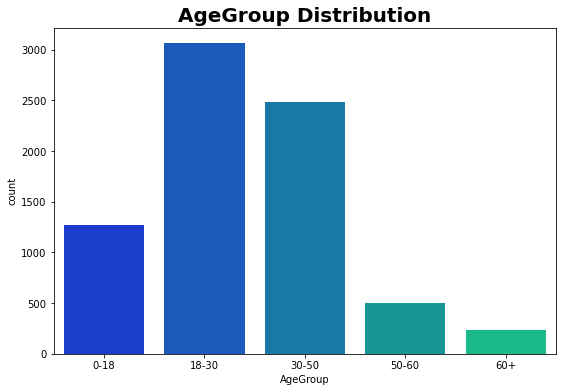

In [11]:
#AgeGroup
plt.figure(figsize=(9,6))
AgeGroup_sorted = data_train.sort_values('AgeGroup')
sns.countplot(x='AgeGroup', data=AgeGroup_sorted, palette = 'winter')
plt.title("AgeGroup Distribution", size = 20, weight='bold')
print(colored(f"Percentage of 0-18 - {(len(data_train[data_train['AgeGroup']=='0-18']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of 18-30 - {(len(data_train[data_train['AgeGroup']=='18-30']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of 30-50 - {(len(data_train[data_train['AgeGroup']=='30-50']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of 50-60 - {(len(data_train[data_train['AgeGroup']=='50-60']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of 60+ - {(len(data_train[data_train['AgeGroup']=='60+']) / data_train.shape[0])*100:.2f}%", 'blue'))
plt.show()


AgeGroup Distribution:
  AgeGroup  Count
0    18-30   3065
1    30-50   2483
2     0-18   1270
3    50-60    504
4      60+    237


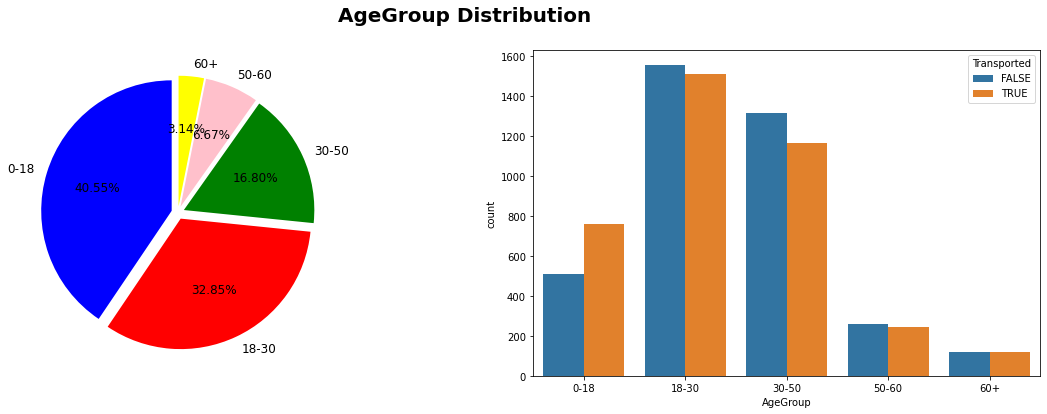

In [12]:
#AgeGroup VS Trasported
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('AgeGroup Distribution', size = 20, weight='bold')

sizes = list(AgeGroup_sorted['AgeGroup'].value_counts())

labels = AgeGroup_sorted['AgeGroup'].dropna().unique()
colors = ['blue', 'red','green','pink','yellow']
explode = (0.05,0.05,0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='AgeGroup', data=AgeGroup_sorted, hue='Transported', ax=ax[1])

print(colored("AgeGroup Distribution:",'green'))
data10 = pd.DataFrame(AgeGroup_sorted['AgeGroup'].value_counts()).reset_index().rename(columns={'index': 'AgeGroup', 'AgeGroup':'Count'})
print(colored(data10, 'green'))

plt.show()

Percentage of Normal - 64.21%
Percentage of Cryostasis - 35.79%


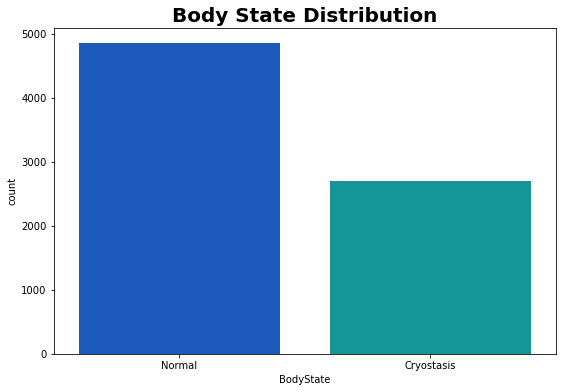

In [13]:
#BodyState
plt.figure(figsize=(9,6))

sns.countplot(x='BodyState', data=data_train, palette = 'winter')
plt.title("Body State Distribution", size = 20, weight='bold')
print(colored(f"Percentage of Normal - {(len(data_train[data_train['BodyState']=='Normal']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of Cryostasis - {(len(data_train[data_train['BodyState']=='Cryostasis']) / data_train.shape[0])*100:.2f}%", 'blue'))
plt.show()



Body State Distribution:
    BodyState  Count
0      Normal   4854
1  Cryostasis   2705


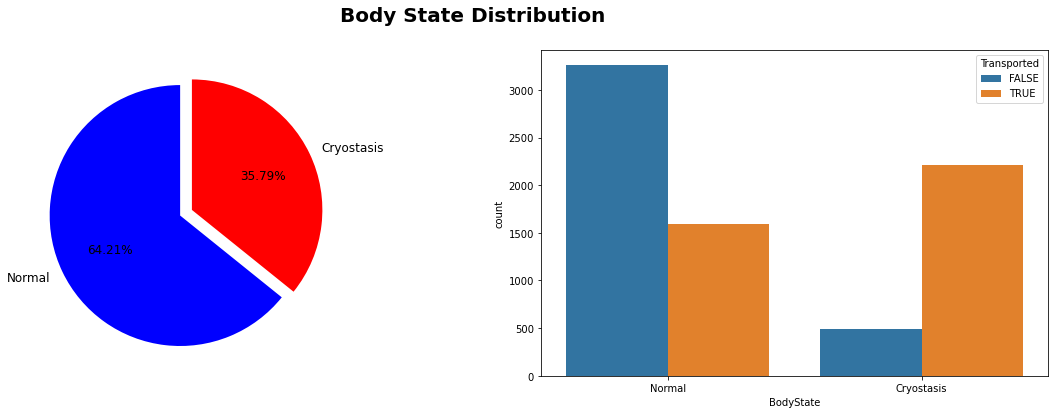

In [14]:
#BodyState VS Trasported
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Body State Distribution', size = 20, weight='bold')

sizes = list(data_train['BodyState'].value_counts())

labels = data_train['BodyState'].dropna().unique()
colors = ['blue', 'red']
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='BodyState', data=data_train, hue='Transported', ax=ax[1])

print(colored("Body State Distribution:",'green'))
data2 = pd.DataFrame(data_train['BodyState'].value_counts()).reset_index().rename(columns={'index': 'BodyState', 'BodyState':'Count'})
print(colored(data2, 'green'))

plt.show()

Percentage of Kepler 186f - 69.49%
Percentage of Kepler 452b - 9.37%
Percentage of Kepler 442b - 21.14%


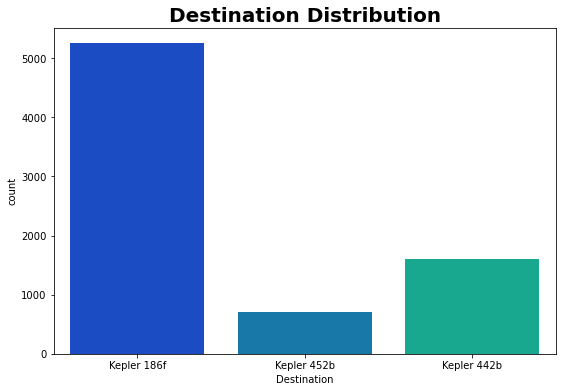

In [15]:
#Destination
plt.figure(figsize=(9,6))

sns.countplot(x='Destination', data=data_train, palette = 'winter')
plt.title("Destination Distribution", size = 20, weight='bold')
print(colored(f"Percentage of Kepler 186f - {(len(data_train[data_train['Destination']=='Kepler 186f']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of Kepler 452b - {(len(data_train[data_train['Destination']=='Kepler 452b']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of Kepler 442b - {(len(data_train[data_train['Destination']=='Kepler 442b']) / data_train.shape[0])*100:.2f}%", 'blue'))
plt.show()


Destination Distribution:
   Destination  Count
0  Kepler 186f   5253
1  Kepler 442b   1598
2  Kepler 452b    708


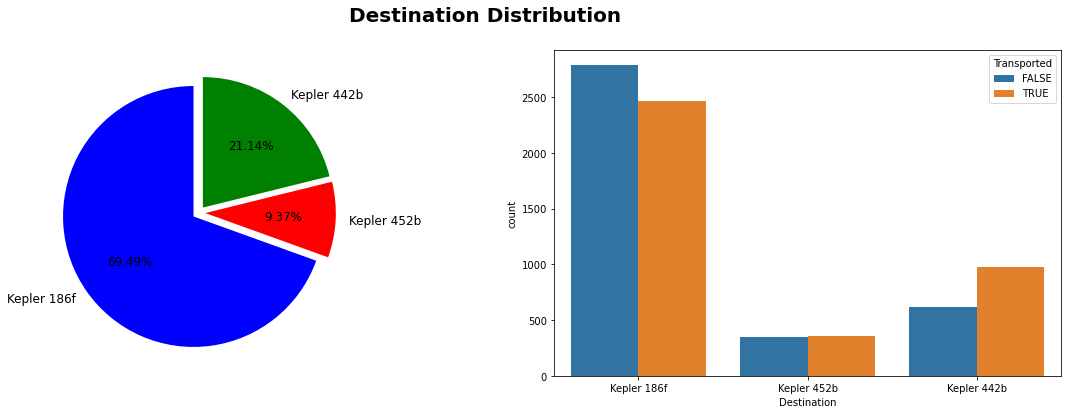

In [16]:
#Destination VS Transported
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Destination Distribution', size = 20, weight='bold')

sizes = list(data_train['Destination'].value_counts(sort=False))

labels = data_train['Destination'].dropna().unique()
colors = ['blue', 'red', 'green']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Destination', data=data_train, hue='Transported', ax=ax[1])

print(colored("Destination Distribution:",'green'))
data3 = pd.DataFrame(data_train['Destination'].value_counts()).reset_index().rename(columns={'index': 'Destination', 'Destination':'Count'})
print(colored(data3, 'green'))

plt.show()

Percentage of VIP - 2.38%
Percentage of NO VIP - 97.62%


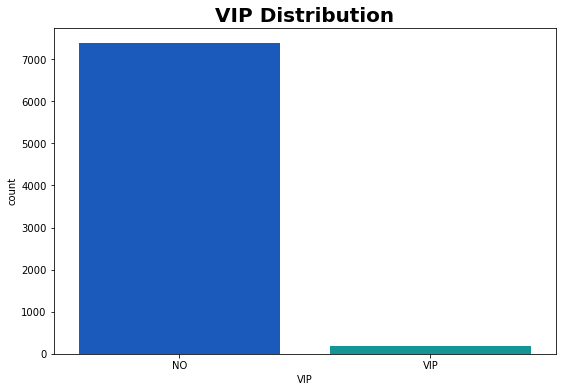

In [17]:
#VIP
plt.figure(figsize=(9,6))

sns.countplot(x='VIP', data=data_train, palette = 'winter')
plt.title("VIP Distribution", size = 20, weight='bold')
print(colored(f"Percentage of VIP - {(len(data_train[data_train['VIP']=='VIP']) / data_train.shape[0])*100:.2f}%", 'blue'))
print(colored(f"Percentage of NO VIP - {(len(data_train[data_train['VIP']=='NO']) / data_train.shape[0])*100:.2f}%", 'blue'))
plt.show()

VIP Distribution:
   VIP  Count
0   NO   7379
1  VIP    180


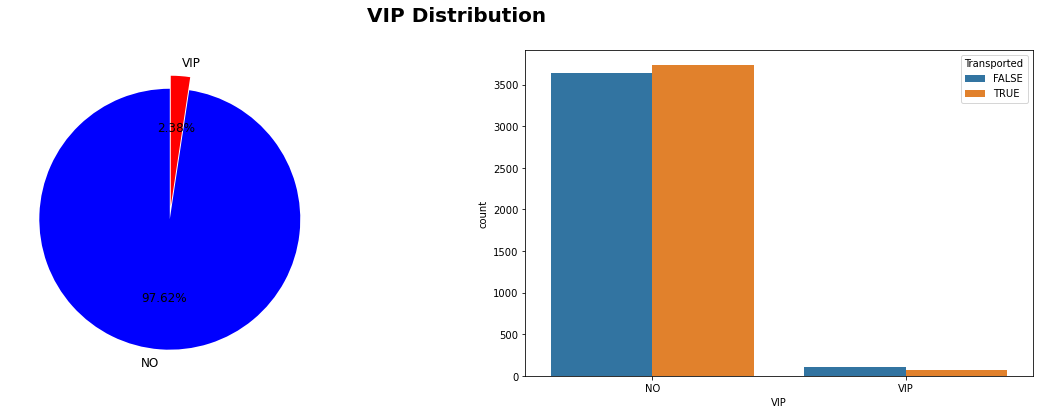

In [18]:
#VIP VS Transported
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VIP Distribution', size = 20, weight='bold')

sizes = list(data_train['VIP'].value_counts())

labels = data_train['VIP'].dropna().unique()
colors = ['blue', 'red']
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='VIP', data=data_train, hue='Transported', ax=ax[1])

print(colored("VIP Distribution:",'green'))
data4 = pd.DataFrame(data_train['VIP'].value_counts()).reset_index().rename(columns={'index': 'VIP', 'VIP':'Count'})
print(colored(data4, 'green'))

plt.show()

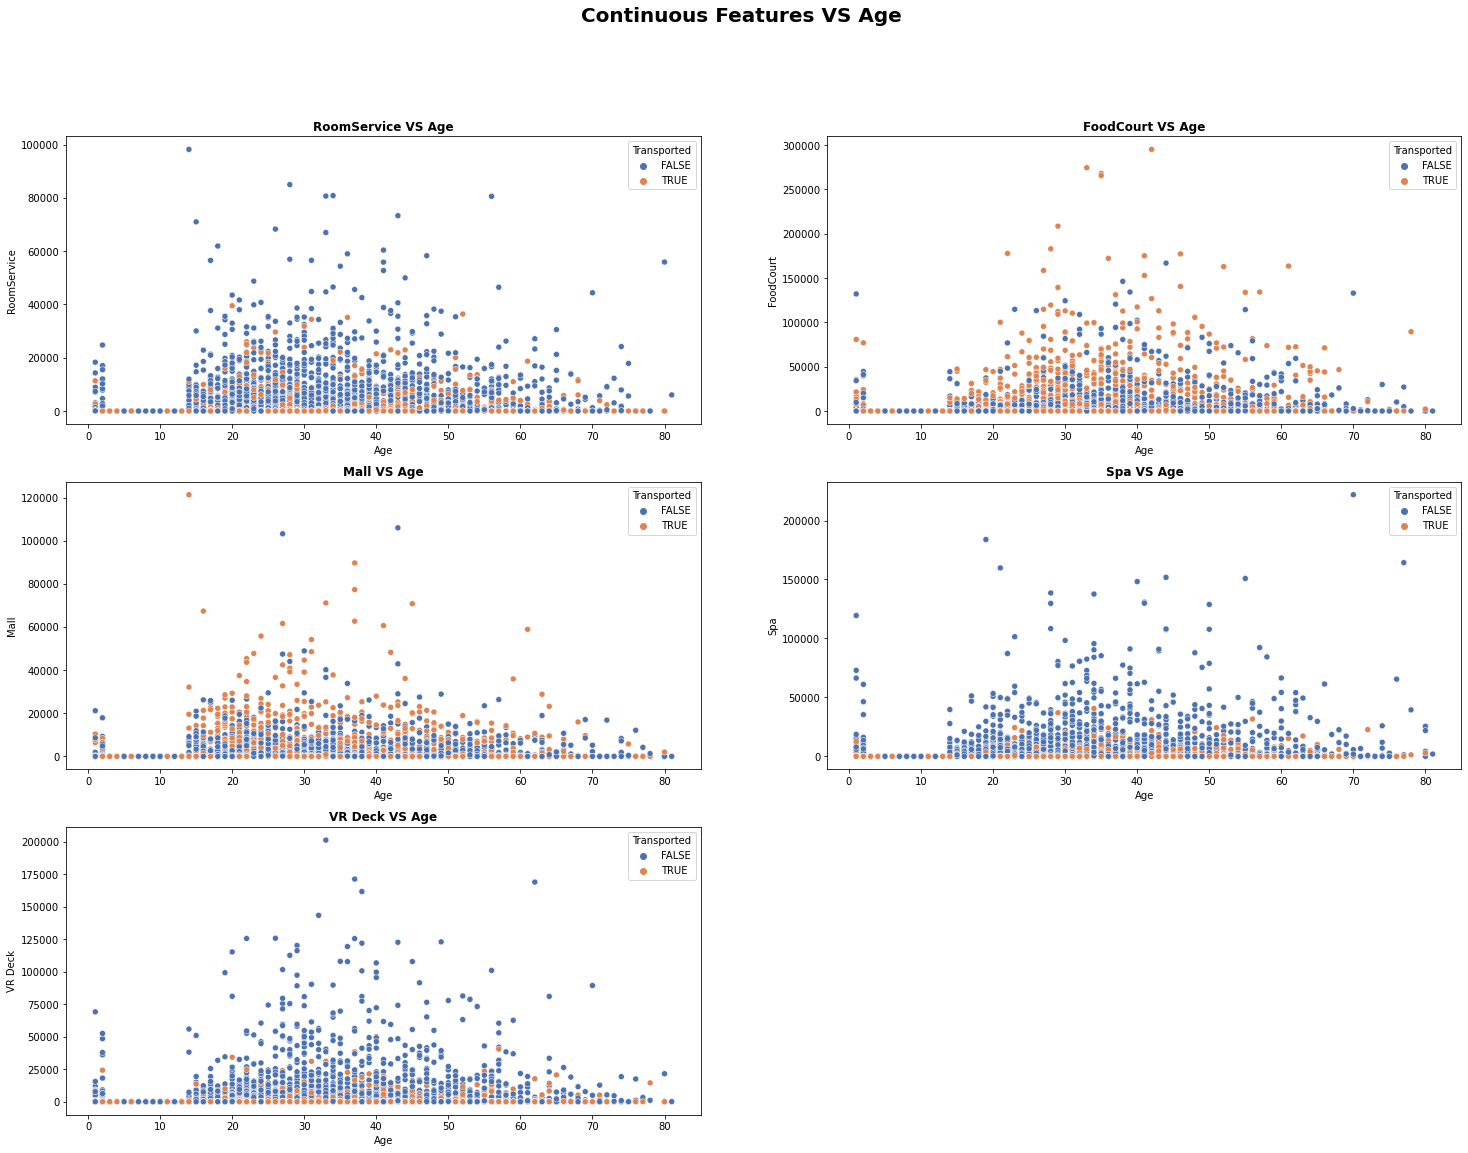

In [19]:
#Continuous Features VS Age
fig, ax = plt.subplots(3, 2, figsize=(25, 18))
fig.suptitle('Continuous Features VS Age', size = 20, weight='bold')
fig.delaxes(ax[2][1])

df_temp = data_train.iloc[:, 7:14]
columns = df_temp.columns[2:]
for i, col in enumerate(columns):
    sns.scatterplot(x='Age', y=col, hue='Transported', data=data_train, ax=fig.axes[i], palette='deep')
    fig.axes[i].set_title(f'{col} VS Age', weight='bold')
plt.show()

Total_Expenses Distribution - 
Minimum Total_Expenses - 0.0
Maximum Total_Expenses - 356271.3
Average Total_Expenses - 14307.265471623241


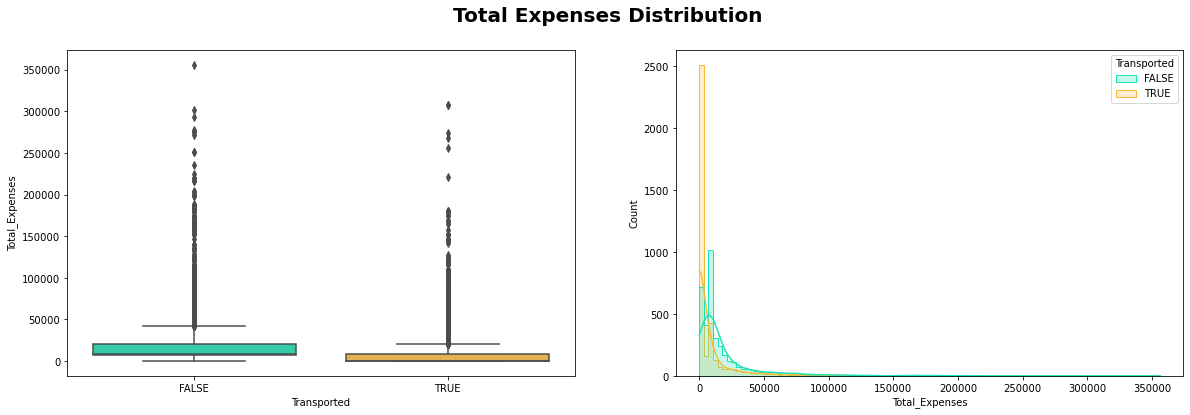

NoSpent Distribution - 
   NoSpent  Count
0    False   4401
1     True   3158


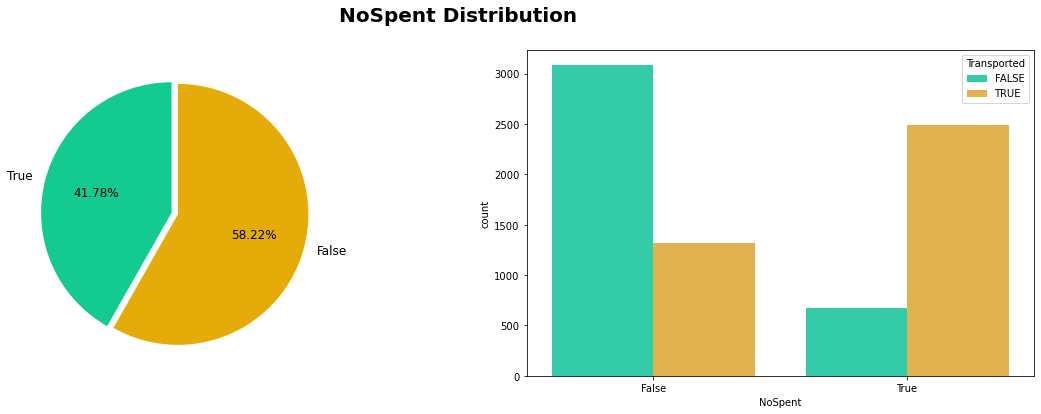

In [20]:
#Creation of Total_Expenses and NoSpent (train)
data_train['Total_Expenses'] = data_train[df_temp.columns[2:]].sum(axis=1)
data_train['NoSpent'] = data_train['Total_Expenses']==0

#Creation of Total_Expenses and NoSpent (test)
data_test['Total_Expenses'] = data_test[df_temp.columns[2:]].sum(axis=1)
data_test['NoSpent'] = data_test['Total_Expenses']==0

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Total Expenses Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Total_Expenses', data=data_train, ax=ax[0], palette='turbo')
sns.histplot(x='Total_Expenses', element="step", kde=True, data=data_train, hue='Transported', bins=100, ax=ax[1], palette='turbo')

print(colored("Total_Expenses Distribution - ", 'cyan'))
print(colored(f"Minimum Total_Expenses - {data_train['Total_Expenses'].describe()['min']}", 'cyan'))
print(colored(f"Maximum Total_Expenses - {data_train['Total_Expenses'].describe()['max']}", 'cyan'))
print(colored(f"Average Total_Expenses - {data_train['Total_Expenses'].describe()['mean']}", 'cyan'))

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('NoSpent Distribution', size = 20, weight='bold')

sizes = list(data_train['NoSpent'].value_counts(sort=False))

labels = data_train['NoSpent'].dropna().unique()
colors = ['#13CA91', '#e5ab09']
explode = (0.0,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='NoSpent', data=data_train, hue='Transported', ax=ax[1], palette='turbo')

print(colored("NoSpent Distribution - ",'cyan'))
data5 = pd.DataFrame(data_train['NoSpent'].value_counts()).reset_index().rename(columns={'index': 'NoSpent', 'NoSpent':'Count'})
print(colored(data5, 'cyan'))

plt.show()

In [21]:
#Drop indifferent values (train)
data_train.drop(['TicketNo', 'Cabin', 'First Name','Last Name'], axis=1, inplace=True)

#Drop indifferent values (test)
data_test.drop(['TicketNo', 'Cabin', 'First Name','Last Name'], axis=1, inplace=True)

In [22]:
#Utilize LabelEncoder for categorical variables transformation (train)
for col in data_train.columns[data_train.dtypes == object]:
    encoder = LabelEncoder()
    data_train[col] = encoder.fit_transform(data_train[col])
    
for col in data_train.columns[data_train.dtypes == bool]:
    data_train[col] = data_train[col].astype('int')
    
#Utilize LabelEncoder for categorical variables transformation (test)
for col in data_test.columns[data_test.dtypes == object]:
    encoder = LabelEncoder()
    data_test[col] = encoder.fit_transform(data_test[col])
    
for col in data_test.columns[data_test.dtypes == bool]:
    data_test[col] = data_test[col].astype('int')

In [23]:
data_train.head(10)

,HomePlanet,Destination,BodyState,Age,VIP,RoomService,FoodCourt,Mall,Spa,VR Deck,Transported,deck,side,AgeGroup,Total_Expenses,NoSpent
0,2,0,1,41.0,0,0.0,0.0,0.0,0.0,0.0,0,2,0,2,0.0,1
1,1,0,1,26.0,0,1079.1,89.1,247.5,5435.1,435.6,1,4,1,1,7286.4,0
2,2,0,1,60.0,1,425.7,35402.4,0.0,66478.5,485.1,0,1,1,3,102791.7,0
3,2,0,1,34.0,0,0.0,12701.7,3672.9,32957.1,1910.7,0,1,1,2,51242.4,0
4,1,0,1,18.0,0,2999.7,693.0,1494.9,5593.5,19.8,1,4,1,0,10800.9,0
5,1,2,1,46.0,0,0.0,4781.7,0.0,2880.9,0.0,1,4,0,2,7662.6,0
6,1,0,1,28.0,0,415.8,15236.1,29.7,0.0,0.0,1,4,1,1,15681.6,0
7,1,0,0,29.0,0,0.0,0.0,0.0,0.0,0.0,1,5,1,1,0.0,1
8,1,0,1,37.0,0,0.0,7771.5,168.3,2138.4,0.0,1,4,1,2,10078.2,0
9,2,1,0,16.0,0,0.0,0.0,0.0,0.0,0.0,1,2,0,0,0.0,1


In [24]:
#BodyState: 0-->1 and 1-->0
#Split dataset to train and test
#data['BodyState'] = data['BodyState'].replace([0,1],[1,0])
X_train = data_train.drop('Transported', axis=1)
y_train = data_train['Transported']

X_test = data_test.drop('Transported', axis=1)
y_test = data_test['Transported']
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=5)

print(colored(f"Number of rows in training set - {len(X_train)}", 'blue'))
print(colored(f"Number of rows in validation set - {len(X_test)}", 'green'))

Number of rows in training set - 7559
Number of rows in validation set - 3749


In [25]:
#train models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

MLA = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    RandomForestClassifier() 
]
svc = SVC()
lr = LogisticRegression()
row_index = 0


MLA_cols = ['Model', 'Accuracy']
MLA_compare = pd.DataFrame(columns = MLA_cols)

# Iterate and store scores in the table
for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    MLA_compare.loc[row_index, 'Accuracy'] = cv_results.mean()
    
    row_index+=1
# Present table
MLA_compare.sort_values(by=['Accuracy'], ascending=False, inplace=True)
MLA_compare



C:\Users\Giannos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Giannos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

,Model,Accuracy
3,RandomForestClassifier,0.791244
0,LogisticRegression,0.79058
1,SVC,0.788333
2,KNeighborsClassifier,0.776428


In [26]:
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
pred = pd.DataFrame({
'TicketNo': data_test_copy['TicketNo'],
'Transported': Y_pred
})

C:\Users\Giannos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
pred.to_csv('Submission_Results.csv',index=False)